In [1]:
import numpy as np
import pyrap.tables as pt
import scipy.constants as phys

from os import F_OK

In [2]:
msfile = "ngc3621_fixvis_split.ms"
prefix = "ngc3621_split"
print('label: {}'.format(prefix))

label: ngc3621_split


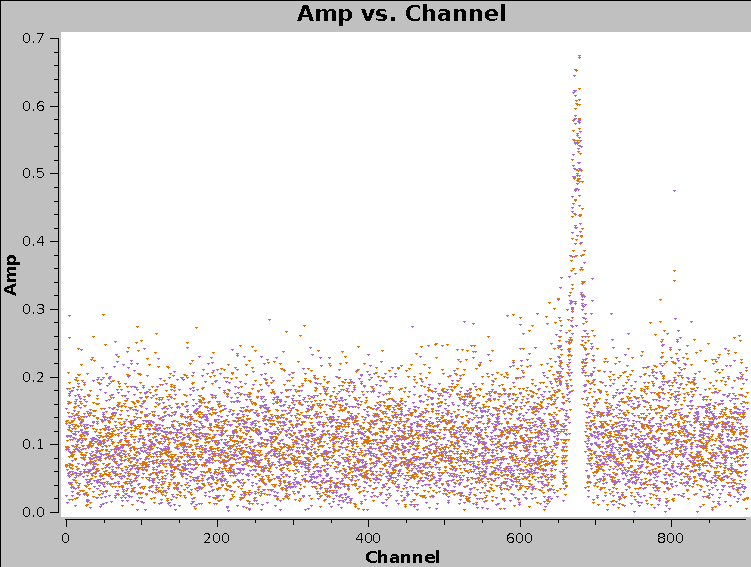

True

Show log 2020-03-29 09:00:26	INFO	plotms::::	
 2020-03-29 09:00:26	INFO	plotms::::+	##########################################
 2020-03-29 09:00:26	INFO	plotms::::+	##### Begin Task: plotms #####
 2020-03-29 09:00:26	INFO	plotms::::	plotms(vis="ngc3621_fixvis_split.ms",gridrows=1,gridcols=1,rowindex=0,colindex=0,
 2020-03-29 09:00:26	INFO	plotms::::+ plotindex=0,xaxis="channel",xdatacolumn="",xframe="",xinterp="",
 2020-03-29 09:00:26	INFO	plotms::::+ yaxis="amp",ydatacolumn="",yframe="",yinterp="",yaxislocation="",
 2020-03-29 09:00:26	INFO	plotms::::+ selectdata=True,field="",spw="",timerange="",uvrange="",
 2020-03-29 09:00:26	INFO	plotms::::+ antenna="",scan="",correlation="XX,YY",array="",observation="",
 2020-03-29 09:00:26	INFO	plotms::::+ intent="",feed="",msselect="",averagedata=True,avgchannel="",
 2020-03-29 09:00:26	INFO	plotms::::+ avgtime="3300",avgscan=False,avgfield=False,avgbaseline=True,avgantenna=False,
 2020-03-29 09:00:26	INFO	plotms::::+ avgspw=False,scalar=False,transform=True,freqframe="",restfreq="",
 2020-03-29 09:00:26	INFO	plotms::::+ veldef="RADIO",shift=[0.0, 0.0],extendflag=False,extcorr=False,extchannel=False,
 2020-03-29 09:00:26	INFO	plotms::::+ iteraxis="",xselfscale=False,yselfscale=False,xsharedaxis=False,ysharedaxis=False,
 2020-03-29 09:00:26	INFO	plotms::::+ customsymbol=False,symbolshape="autoscaling",symbolsize=2,symbolcolor="0000ff",symbolfill="fill",
 2020-03-29 09:00:26	INFO	plotms::::+ symboloutline=False,coloraxis="corr",customflaggedsymbol=False,flaggedsymbolshape="circle",flaggedsymbolsize=2,
 2020-03-29 09:00:26	INFO	plotms::::+ flaggedsymbolcolor="ff0000",flaggedsymbolfill="fill",flaggedsymboloutline=False,xconnector="",timeconnector=False,
 2020-03-29 09:00:26	INFO	plotms::::+ plotrange=[],title="",titlefont=0,xlabel="",xaxisfont=0,
 2020-03-29 09:00:26	INFO	plotms::::+ ylabel="",yaxisfont=0,showmajorgrid=False,majorwidth=1,majorstyle="",
 2020-03-29 09:00:26	INFO	plotms::::+ majorcolor="B0B0B0",showminorgrid=False,minorwidth=1,minorstyle="",minorcolor="D0D0D0",
 2020-03-29 09:00:26	INFO	plotms::::+ showlegend=False,legendposition="",plotfile="plotms_temp.png",expformat="",verbose=True,
 2020-03-29 09:00:26	INFO	plotms::::+ exprange="",highres=False,dpi=-1,width=-1,height=-1,
 2020-03-29 09:00:26	INFO	plotms::::+ overwrite=True,showgui=False,clearplots=True,callib=[''],headeritems="",
 2020-03-29 09:00:26	INFO	plotms::::+ showatm=False,showtsky=False)
 2020-03-29 09:00:28	INFO	PlotMS::params_changed	Updating: REDRAW, MSDATA, CACHE, AXES, CANVAS, DISPLAY, PAGEHEADER, ITERATION, LOG, PLOTMS_OPTIONS.
 2020-03-29 09:00:28	INFO	PlotMS::load_cache	Clearing the existing plotms cache.
 2020-03-29 09:00:28	INFO	PlotMS::params_changed	Updating: REDRAW, MSDATA, CACHE, AXES, CANVAS, DISPLAY, PAGEHEADER, ITERATION, LOG, PLOTMS_OPTIONS.
 2020-03-29 09:00:28	INFO	PlotMS::load_cache	Clearing the existing plotms cache.
 2020-03-29 09:00:28	INFO	PlotMS::load_cache	START Current memory usage: 2296.8 kilobytes.
 2020-03-29 09:00:28	INFO	PlotMS::load_cache	Plot Data Transformations:
 2020-03-29 09:00:28	INFO	PlotMS::load_cache+ Frame = 
 2020-03-29 09:00:28	INFO	PlotMS::load_cache+ VelDef = RADIO
 2020-03-29 09:00:28	INFO	PlotMS::load_cache+ RestFreq = 0 MHz
 2020-03-29 09:00:28	INFO	PlotMS::load_cache+ dX = 0 arcsec
 2020-03-29 09:00:28	INFO	PlotMS::load_cache+ dY = 0 arcsec
 2020-03-29 09:00:28	INFO	PlotMS::load_cache+ formStokes = false
 2020-03-29 09:00:28	INFO	PlotMS::load_cache	Data Averaging: 
 2020-03-29 09:00:28	INFO	PlotMS::load_cache+ Using VECTOR averaging.
 2020-03-29 09:00:28	INFO	PlotMS::load_cache+ Time: 3300 seconds. Scan: false; Field: false
 2020-03-29 09:00:28	INFO	PlotMS::load_cache+ All Baselines: true
 2020-03-29 09:00:28	INFO	PlotMS::load_cache	Plot Data Calibration:
 2020-03-29 09:00:28	INFO	PlotMS::load_cache+ Use Calibration = 0
 2020-03-29 09:00:28	INFO	PlotMS::load_cache+ Calibration Library = 
 2020-03-29 09:00:28	INFO	PlotMS::load_cache	Caching for the new plot: Amp

In [3]:
plotms(vis=msfile, xaxis='channel', yaxis='amp', correlation='XX,YY',
       coloraxis='corr', averagedata=True, avgtime='3300', avgbaseline=True)

In [4]:
restfreq = '1.420405752GHz'
print('restfreq: {}'.format(restfreq))

restfreq: 1.420405752GHz


### Transform spectral reference frame

Transform the visibilities to a spectral reference frame for the science analysis, e.g. from TOPO to LSRK, to correct for Doppler shifts throughout the time of the observation.

In [5]:
cvel_msfile = prefix + '.cvel.ms'
if os.access(cvel_msfile, F_OK):
    print('Deleting existing measurement set {}'.format(cvel_msfile))
    os.system('rm -rf '+ cvel_msfile)
cvel_msfile_flags = prefix + '.cvel.ms.flagversions'
if os.access(cvel_msfile_flags, F_OK):
    print('Deleting existing measurement set {}'.format(cvel_msfile_flags))
    os.system('rm -rf '+ cvel_msfile_flags)

Deleting existing measurement set ngc3621_split.cvel.ms
Deleting existing measurement set ngc3621_split.cvel.ms.flagversions


In [6]:
cvel(vis=msfile,
     outputvis=cvel_msfile,
     mode='channel',
     interpolation='linear',
     outframe='LSRK',
     restfreq=restfreq)

print('Flagging with uv-clip')
flagdata(vis=cvel_msfile,
         mode='clip',
         clipminmax=[1e-5, 1000.0])

Flagging with uv-clip


{}

Show log 2020-03-29 09:00:31	INFO	cvel::::	
 2020-03-29 09:00:31	INFO	cvel::::+	##########################################
 2020-03-29 09:00:31	INFO	cvel::::+	##### Begin Task: cvel #####
 2020-03-29 09:00:31	INFO	cvel::::	cvel(vis="ngc3621_fixvis_split.ms",outputvis="ngc3621_split.cvel.ms",passall=False,field="",spw="",
 2020-03-29 09:00:31	INFO	cvel::::+ selectdata=True,antenna="",timerange="",scan="",array="",
 2020-03-29 09:00:31	INFO	cvel::::+ mode="channel",nchan=-1,start=0,width=1,interpolation="linear",
 2020-03-29 09:00:31	INFO	cvel::::+ phasecenter="",restfreq="1.420405752GHz",outframe="LSRK",veltype="radio",hanning=False)
 2020-03-29 09:00:31	SEVERE	cvel::MeasTable::dUTC(Double) (file /usr/local/casa/casacore/measures/Measures/MeasTable.cc, line 4290)	Leap second table TAI_UTC seems out-of-date.
 2020-03-29 09:00:31	SEVERE	cvel::MeasTable::dUTC(Double) (file /usr/local/casa/casacore/measures/Measures/MeasTable.cc, line 4290)+	Until the table is updated (see the CASA documentation or your system admin),
 2020-03-29 09:00:31	SEVERE	cvel::MeasTable::dUTC(Double) (file /usr/local/casa/casacore/measures/Measures/MeasTable.cc, line 4290)+	times and coordinates derived from UTC could be wrong by 1s or more.
 2020-03-29 09:00:31	INFO	cvel::::	Creating working copy ...
 2020-03-29 09:00:31	INFO	cvel::::	Using NGC3621 (original field 0, new field 0) as common direction for the output reference frame.
 2020-03-29 09:00:31	INFO	ms::cvel	Input spectral window 0 has 900 channels of width 2.612305e+04 Hz
 2020-03-29 09:00:31	INFO	ms::cvel+ First channel center = 1.399359375e+09 Hz, last channel center = 1.422843994e+09 Hz
 2020-03-29 09:00:31	INFO	ms::cvel	Starting combination of spectral windows ...
 2020-03-29 09:00:31	INFO	SubMS::combineSpws()	Less than two SPWs selected. No combination necessary.
 2020-03-29 09:00:31	INFO	ms::cvel 
 2020-03-29 09:00:31	INFO	ms::cvel	Testing if spectral frame transformation/regridding is needed ...
 2020-03-29 09:00:31	INFO	SubMS::regridSpw()	Using tabulated observatory position for MeerKAT:
 2020-03-29 09:00:31	INFO	SubMS::regridSpw() Position: [5.10922e+06, 2.0068e+06, -3.23913e+06] (ITRF)
 2020-03-29 09:00:31	INFO	SubMS::regridSpw()	Regridded spectral window 0 will be created for field 0 with parameters 
 2020-03-29 09:00:31	INFO	SubMS::regridSpw()+	input frame = TOPO, output frame = LSRK
 2020-03-29 09:00:31	INFO	SubMS::regridSpw()+ Channels equidistant in freq
 2020-03-29 09:00:31	INFO	SubMS::regridSpw()+ Central frequency (in output frame) = 1.41116e+09 Hz
 2020-03-29 09:00:31	INFO	SubMS::regridSpw()+ Width of central channel (in output frame) = 26124.2 Hz
 2020-03-29 09:00:31	INFO	SubMS::regridSpw()+ Number of channels = 900
 2020-03-29 09:00:31	INFO	SubMS::regridSpw()+ Total width of SPW (in output frame) = 2.35118e+07 Hz
 2020-03-29 09:00:31	INFO	SubMS::regridSpw()+ Lower edge = 1.39941e+09 Hz, upper edge = 1.42292e+09 Hz
 2020-03-29 09:00:31	INFO	SubMS::regridSpw()+ Interpolation Method = linear
 2020-03-29 09:00:31	INFO	SubMS::regridSpw()	Added 1 new rows to the DATA_DESCRIPTION table and deleted 1 old ones.
 2020-03-29 09:00:31	INFO	SubMS::regridSpw()+	Added 1 rows to the SPECTRAL_WINDOW table and deleted 1 old ones.
 2020-03-29 09:00:31	INFO	SubMS::regridSpw()+	Added 1 rows to the SOURCE table and deleted 1 old ones.
 2020-03-29 09:00:31	INFO	SubMS::regridSpw()	Main table data array columns will be rewritten.
 2020-03-29 09:00:44	INFO	ms::cvel	Spectral frame transformation/regridding completed.
 2020-03-29 09:00:45	INFO	ms::cvel	Final spectral window has 900 channels of width 2.612421e+04 Hz
 2020-03-29 09:00:45	INFO	ms::cvel+	First channel center = 1.399421543e+09 Hz, last channel center = 1.422907205e+09 Hz
 2020-03-29 09:00:45	INFO	cvel::::	CASA Version 5.5.0-149 
 2020-03-29 09:00:45	INFO	cvel::::	
 2020-03-29 09:00:45	INFO	cvel::::	##### End Task: cvel #####
 2020-03-29 09:00:45	INFO	cvel::::+	##########################################
 2020-03-29 09:00:45	INFO	flagdata::::	
 

Results can be visualised with:
```
plotms(vis=cvel_msfile, xaxis='channel', yaxis='amp', correlation='XX,YY',
       coloraxis='corr', averagedata=True, avgtime='3300', avgbaseline=True)
```

### UV-plane subtraction

Continuum fitting and subtraction in the uv plane from spectral-line data

In [7]:
contsub_vis = prefix + '.cvel.ms.contsub'
if os.access(contsub_vis, F_OK):
    print('Deleting existing measurement set {}'.format(contsub_vis))
    os.system('rm -rf '+ contsub_vis)
print(contsub_vis)

Deleting existing measurement set ngc3621_split.cvel.ms.contsub
ngc3621_split.cvel.ms.contsub


In [8]:
cont_vis = prefix + '.cvel.ms.cont'
if os.access(cont_vis, F_OK):
    print('Deleting existing measurement set {}'.format(cont_vis))
    os.system('rm -rf '+ cont_vis)
print(cont_vis)

Deleting existing measurement set ngc3621_split.cvel.ms.cont
ngc3621_split.cvel.ms.cont


In [9]:
uvcontsub(vis=cvel_msfile,
          fitspw='0:0~500;830~900',
          excludechans=False,
          fitorder=1,
          solint='int',
          want_cont=True,
          )

True

Show log 2020-03-29 09:00:46	INFO	uvcontsub::::	
 2020-03-29 09:00:46	INFO	uvcontsub::::+	##########################################
 2020-03-29 09:00:46	INFO	uvcontsub::::+	##### Begin Task: uvcontsub #####
 2020-03-29 09:00:46	INFO	uvcontsub::::	uvcontsub(vis="ngc3621_split.cvel.ms",field="",fitspw="0:0~500;830~900",excludechans=False,combine="",
 2020-03-29 09:00:46	INFO	uvcontsub::::+ solint="int",fitorder=1,spw="",want_cont=True)
 2020-03-29 09:00:46	INFO	uvcontsub::::	Preparing to add scratch columns.
 2020-03-29 09:00:46	INFO	uvcontsub::::	Copying ngc3621_split.cvel.ms to /home/jupyter/MeerKAT-Cookbook/casa/ngc3621_split.cvel.ms.contsub7Uqfny with cp.
 2020-03-29 09:00:46	INFO	uvcontsub::::	CASA Version 5.5.0-149 
 2020-03-29 09:00:46	INFO	uvcontsub::::	
 2020-03-29 09:00:46	WARN	calibrater::setvi(bool,bool)	Forcing use of OLD VisibilityIterator.
 2020-03-29 09:00:46	INFO	calibrater::open	****Using OLD VI-driven calibrater tool****
 2020-03-29 09:00:46	INFO	calibrater::open	Opening MS: /home/jupyter/MeerKAT-Cookbook/casa/ngc3621_split.cvel.ms.contsub7Uqfny for calibration.
 2020-03-29 09:00:46	INFO Clearing all model records in MS header.
 2020-03-29 09:00:46	INFO	VisSetUtil::addScrCols	Adding MODEL_DATA and CORRECTED_DATA column(s).
 2020-03-29 09:00:47	INFO	VisSetUtil::addScrCols	Start copying column keyword(s) of CORRECTED_DATA from DATA
 2020-03-29 09:00:47	INFO	VisSetUtil::initScrCols	Initializing MODEL_DATA to (unity).
 2020-03-29 09:00:47	INFO	VisSetUtil::initScrCols	Initialized 9450 rows.
 2020-03-29 09:00:47	INFO	Calibrater::	Initializing nominal selection to the whole MS.
 2020-03-29 09:00:47	INFO	calibrater::reset	Reseting solve/apply state
 2020-03-29 09:00:47	INFO	calibrater::setdata	Beginning selectvis--(MSSelection version)-------
 2020-03-29 09:00:47	INFO	calibrater::reset	Reseting solve/apply state
 2020-03-29 09:00:47	INFO	Calibrater::selectvis	Performing selection on MeasurementSet
 2020-03-29 09:00:47	INFO	Calibrater::selectvis+ Selecting on spw: '0:0~500;830~900'
 2020-03-29 09:00:47	WARN	MSSpw Expression parser::MSSpwIndex::convertToChannelIndex (file /usr/local/casa/casacore/ms/MSSel/MSSpwIndex.cc, line 416)	Channel 900 out of range for SPW 0 (valid range 0~899). Limiting it to be within the available range.
 2020-03-29 09:00:47	INFO	Calibrater::selectvis	Selection did not drop any rows
 2020-03-29 09:00:47	WARN	MSSpw Expression parser::MSSpwIndex::convertToChannelIndex (file /usr/local/casa/casacore/ms/MSSel/MSSpwIndex.cc, line 416)	Channel 900 out of range for SPW 0 (valid range 0~899). Limiting it to be within the available range.
 2020-03-29 09:00:47	WARN	MSSpw Expression parser::MSSpwIndex::convertToChannelIndex (file /usr/local/casa/casacore/ms/MSSel/MSSpwIndex.cc, line 416)	Channel 900 out of range for SPW 0 (valid range 0~899). Limiting it to be within the available range.
 2020-03-29 09:00:47	INFO	Calibrater::selectvis	Frequency selection: 
 2020-03-29 09:00:47	INFO	Calibrater::selectvis	. Spw 0:0~500 (501 channels, step by 1)
 2020-03-29 09:00:47	INFO	Calibrater::selectvis+	. Spw 0:830~899 (70 channels, step by 1)
 2020-03-29 09:00:47	INFO	calibrater::setdata	chanmode=none nchan=1 start=0 step=1 mStart='0km/s' mStep='0km/s' msSelect=''
 2020-03-29 09:00:47	INFO	calibrater::setsolve	Beginning setsolve--(MSSelection version)-------
 2020-03-29 09:00:47	INFO	Calibrater::setsolve	Arranging to SOLVE:
 2020-03-29 09:00:47	INFO	Calibrater::setsolve	. A Mueller: table=/home/jupyter/MeerKAT-Cookbook/casa/Temp_contsub.tabEXCWyg append=false solint=int refantmode='flex' refant='none' minsnr=0 apmode=AP solnorm=false
 2020-03-29 09:00:47	INFO	calibrater::solve	Beginning solve-----------------------------
 2020-03-29 09:00:47	INFO	Calibrater::solve	The following calibration terms are arranged for apply:
 2020-03-29 09:00:47	INFO	Calibrater::solve	. (None)
 2020-03-29 09:00:47	INFO	Calibrater::solve	The following calibration term is arranged for solve:
 2020-03-29 09:00:47	INFO	Calibrater::solve	. A M

Results can be visualised with:
```
plotms(vis=contsub_vis, xaxis='channel', yaxis='amp', correlation='XX,YY',
       coloraxis='corr', averagedata=True, avgtime='3300', avgbaseline=True)
```

### Imaging threshold from data

Image an emission-free channel to estimate rms noise calculates a deconvolved image based on the visibility data

In [10]:
dirty_msfile = prefix + '.dirty.noise'
print('Deleting existing image files for {}'.format(dirty_msfile))
os.system('rm -rf '+ dirty_msfile + '.*')
print(dirty_msfile)

Deleting existing image files for ngc3621_split.dirty.noise
ngc3621_split.dirty.noise


In [11]:
tclean(vis=contsub_vis,
       imagename=dirty_msfile,
       spw='0:50~60',
       start=50,
       nchan=10,
       outframe='LSRK',
       restfreq=restfreq,
       imsize=1024,
       cell='7arcsec',
       stokes='I',
       niter=0)

{}

Show log 2020-03-29 09:00:56	INFO	tclean::::	
 2020-03-29 09:00:56	INFO	tclean::::+	##########################################
 2020-03-29 09:00:56	INFO	tclean::::+	##### Begin Task: tclean #####
 2020-03-29 09:00:56	INFO	tclean::::	tclean(vis="ngc3621_split.cvel.ms.contsub",selectdata=True,field="",spw="0:50~60",timerange="",
 2020-03-29 09:00:56	INFO	tclean::::+ uvrange="",antenna="",scan="",observation="",intent="",
 2020-03-29 09:00:56	INFO	tclean::::+ datacolumn="corrected",imagename="ngc3621_split.dirty.noise",imsize=1024,cell="7arcsec",phasecenter="",
 2020-03-29 09:00:56	INFO	tclean::::+ stokes="I",projection="SIN",startmodel="",specmode="mfs",reffreq="",
 2020-03-29 09:00:56	INFO	tclean::::+ nchan=10,start=50,width="",outframe="LSRK",veltype="radio",
 2020-03-29 09:00:56	INFO	tclean::::+ restfreq="1.420405752GHz",interpolation="linear",perchanweightdensity=False,gridder="standard",facets=1,
 2020-03-29 09:00:56	INFO	tclean::::+ psfphasecenter="",chanchunks=1,wprojplanes=1,vptable="",usepointing=False,
 2020-03-29 09:00:56	INFO	tclean::::+ mosweight=True,aterm=True,psterm=False,wbawp=True,conjbeams=False,
 2020-03-29 09:00:56	INFO	tclean::::+ cfcache="",computepastep=360.0,rotatepastep=360.0,pblimit=0.2,normtype="flatnoise",
 2020-03-29 09:00:56	INFO	tclean::::+ deconvolver="hogbom",scales=[],nterms=2,smallscalebias=0.6,restoration=True,
 2020-03-29 09:00:56	INFO	tclean::::+ restoringbeam=[],pbcor=False,outlierfile="",weighting="natural",robust=0.5,
 2020-03-29 09:00:56	INFO	tclean::::+ noise="1.0Jy",npixels=0,uvtaper=[],niter=0,gain=0.1,
 2020-03-29 09:00:56	INFO	tclean::::+ threshold=0.0,nsigma=0.0,cycleniter=-1,cyclefactor=1.0,minpsffraction=0.05,
 2020-03-29 09:00:56	INFO	tclean::::+ maxpsffraction=0.8,interactive=False,usemask="user",mask="",pbmask=0.0,
 2020-03-29 09:00:56	INFO	tclean::::+ sidelobethreshold=3.0,noisethreshold=5.0,lownoisethreshold=1.5,negativethreshold=0.0,smoothfactor=1.0,
 2020-03-29 09:00:56	INFO	tclean::::+ minbeamfrac=0.3,cutthreshold=0.01,growiterations=75,dogrowprune=True,minpercentchange=-1.0,
 2020-03-29 09:00:56	INFO	tclean::::+ verbose=False,fastnoise=True,restart=True,savemodel="none",calcres=True,
 2020-03-29 09:00:56	INFO	tclean::::+ calcpsf=True,parallel=False)
 2020-03-29 09:00:56	INFO	tclean::::	Verifying Input Parameters
 2020-03-29 09:00:56	INFO	SynthesisImagerVi2::selectData MS : ngc3621_split.cvel.ms.contsub | Selecting on spw :0:50~60 | [Opened in readonly mode]
 2020-03-29 09:00:56	INFO	SynthesisImagerVi2::selectData NRows selected : 9450
 2020-03-29 09:00:56	INFO	SynthesisImagerVi2::defineImage Define image coordinates for [ngc3621_split.dirty.noise] : 
 2020-03-29 09:00:56	INFO	SynthesisImagerVi2::defineImage Impars : start 50
 2020-03-29 09:00:56	INFO	SynthesisImagerVi2::defineImage Shape : [1024, 1024, 1, 1]Spectral : [1.40086e+09] at [0] with increment [287366]
 2020-03-29 09:00:56	INFO	SynthesisImagerVi2::defineImage Set Gridding options for [ngc3621_split.dirty.noise] with ftmachine : gridft
 2020-03-29 09:00:56	INFO	SynthesisImagerVi2::weight() Set imaging weights : Natural weighting
 2020-03-29 09:00:56	INFO	task_tclean::SynthesisDeconvolver::setupDeconvolution Set Deconvolution Options for [ngc3621_split.dirty.noise] : hogbom
 2020-03-29 09:00:56	INFO	task_tclean::SynthesisImager::makePSF ----------------------------------------------------------- Make PSF ---------------------------------------------
 2020-03-29 09:00:56	INFO	task_tclean::SIImageStore::calcSensitivity [ngc3621_split.dirty.noise] Theoretical sensitivity (Jy/bm):0.00137486 
 2020-03-29 09:00:56	INFO	task_tclean::SIImageStore::printBeamSet Beam : 359.174 arcsec, 106.224 arcsec, 84.9161 deg
 2020-03-29 09:00:56	INFO	task_tclean::PBMath::initByDiameter PBMath init to Airy scaled to diameter = 13.5
 2020-03-29 09:00:56	INFO	task_tclean::SynthesisImagerVi2::makePrimaryBeam vi2 : Evaluating Primary Beam model onto image grid(s)
 2020-03-29 09:00:57	INFO	task_tclean::SynthesisImager::executeMajorCycle ---

In [12]:
dirty_image = dirty_msfile + '.image'
print(dirty_image)
noise_stat = imstat(imagename=dirty_image)
threshold = str(noise_stat['rms'][0]*3)+'Jy'
print(threshold)

ngc3621_split.dirty.noise.image
0.0133484764167Jy


Show log 2020-03-29 09:00:57	INFO	imstat::::	
 2020-03-29 09:00:57	INFO	imstat::::+	##########################################
 2020-03-29 09:00:57	INFO	imstat::::+	##### Begin Task: imstat #####
 2020-03-29 09:00:57	INFO	imstat::::	imstat(imagename="ngc3621_split.dirty.noise.image",axes=-1,region="",box="",chans="",
 2020-03-29 09:00:57	INFO	imstat::::+ stokes="",listit=True,verbose=True,mask="",stretch=False,
 2020-03-29 09:00:57	INFO	imstat::::+ logfile="",append=True,algorithm="classic",fence=-1,center="mean",
 2020-03-29 09:00:57	INFO	imstat::::+ lside=True,zscore=-1,maxiter=-1,clmethod="auto",niter=3)
 2020-03-29 09:00:57	INFO	imstat::CasacRegionManager::fromBCS	No directional region specified. Using full positional plane.
 2020-03-29 09:00:57	INFO	imstat::CasacRegionManager::fromBCS	Using all spectral channels.
 2020-03-29 09:00:57	INFO	imstat::CasacRegionManager::fromBCS	Using polarizations ALL
 2020-03-29 09:00:57	INFO	imstat::image::statistics Determining stats for image ngc3621_split.dirty.noise.image
 2020-03-29 09:00:57	INFO	imstat::ImageRegion::fromRecord	Selected bounding box : 
 2020-03-29 09:00:57	INFO	imstat::ImageRegion::fromRecord+ [0, 0, 0, 0] to [1023, 1023, 0, 0] (11:23:04.065, -33.48.14.868, I, 1.40086e+09Hz to 11:13:35.850, -31.48.54.036, I, 1.40086e+09Hz)
 2020-03-29 09:00:57	INFO	imstat::ImageStatsCalculator::_logStartup	Statistics calculated using Classic algorithm
 2020-03-29 09:00:57	INFO	imstat::ImageStatsCalculator::_logStartup	Regions --- 
 2020-03-29 09:00:57	INFO	imstat::ImageStatsCalculator::_logStartup -- bottom-left corner (pixel) [blc]: [0, 0, 0, 0]
 2020-03-29 09:00:57	INFO	imstat::ImageStatsCalculator::_logStartup -- top-right corner (pixel) [trc]: [1023, 1023, 0, 0]
 2020-03-29 09:00:57	INFO	imstat::ImageStatsCalculator::_logStartup -- bottom-left corner (world) [blcf]: 11:23:04.065, -33.48.14.868, I, 1.40086e+09Hz
 2020-03-29 09:00:57	INFO	imstat::ImageStatsCalculator::_logStartup -- top-right corner (world) [trcf]: 11:13:35.850, -31.48.54.036, I, 1.40086e+09Hz
 2020-03-29 09:00:57	INFO	imstat::::	Values --- 
 2020-03-29 09:00:57	INFO	imstat:::: -- flux density [flux]: 0.00448241 Jy
 2020-03-29 09:00:57	INFO	imstat:::: -- number of points [npts]: 391381
 2020-03-29 09:00:57	INFO	imstat:::: -- maximum value [max]: 0.0133484 Jy/beam
 2020-03-29 09:00:57	INFO	imstat:::: -- minimum value [min]: -0.0189775 Jy/beam
 2020-03-29 09:00:57	INFO	imstat:::: -- position of max value (pixel) [maxpos]: [622, 673, 0, 0]
 2020-03-29 09:00:57	INFO	imstat:::: -- position of min value (pixel) [minpos]: [200, 543, 0, 0]
 2020-03-29 09:00:57	INFO	imstat:::: -- position of max value (world) [maxposf]: 11:17:15.634, -32.30.03.071, I, 1.40086e+09Hz
 2020-03-29 09:00:57	INFO	imstat:::: -- position of min value (world) [minposf]: 11:21:09.627, -32.45.06.549, I, 1.40086e+09Hz
 2020-03-29 09:00:57	INFO	imstat:::: -- Sum of pixel values [sum]: 3.95462 Jy/beam
 2020-03-29 09:00:57	INFO	imstat:::: -- Sum of squared pixel values [sumsq]: 7.74855 Jy/beam.Jy/beam
 2020-03-29 09:00:57	INFO	imstat::::	Statistics --- 
 2020-03-29 09:00:57	INFO	imstat:::: -- Mean of the pixel values [mean]: 1.01043e-05 Jy/beam
 2020-03-29 09:00:57	INFO	imstat:::: -- Variance of the pixel values : 1.97979e-05 Jy/beam
 2020-03-29 09:00:57	INFO	imstat:::: -- Standard deviation of the Mean [sigma]: 0.00444949 Jy/beam
 2020-03-29 09:00:57	INFO	imstat:::: -- Root mean square [rms]: 0.00444949 Jy/beam
 2020-03-29 09:00:57	INFO	imstat:::: -- Median of the pixel values [median]: 7.15676e-05 Jy/beam
 2020-03-29 09:00:57	INFO	imstat:::: -- Median of the deviations [medabsdevmed]: 0.0030716 Jy/beam
 2020-03-29 09:00:57	INFO	imstat:::: -- IQR [quartile]: 0.00614347 Jy/beam
 2020-03-29 09:00:57	INFO	imstat:::: -- First quartile [q1]: -0.0030024 Jy/beam
 2020-03-29 09:00:57	INFO	imstat:::: -- Third quartile [q3]: 0.00314107 Jy/beam
 2020-03-29 09:00:57	INFO	imstat::ImageStatsCalculator::statistics	Sum column unit = Jy/beam
 2020-03-29 09:00:57	INFO	imsta

### Making clean cube

In [13]:
cube_image = prefix + '.cube.clean'
print('Deleting existing image files for {}'.format(cube_image))
os.system('rm -rf '+ cube_image + '.*')
print(cube_image)

Deleting existing image files for ngc3621_split.cube.clean
ngc3621_split.cube.clean


In [14]:
tclean(vis=contsub_vis,
       imagename=cube_image,
       start = 650,
       nchan=50,
       chanchunks=1,
       outframe='LSRK',
       restfreq=restfreq,
       imsize=1024,
       cell='1.3arcsec',
       stokes='I',
       threshold = threshold,
       niter=10000000,
       weighting='briggs',
       robust=-1.5,
       interpolation='linear',
       datacolumn='corrected',
       specmode='cube',
       deconvolver='clark',
       gain=0.9,
       restoringbeam='common',
       )

{}

Show log 2020-03-29 09:00:58	INFO	tclean::::	
 2020-03-29 09:00:58	INFO	tclean::::+	##########################################
 2020-03-29 09:00:58	INFO	tclean::::+	##### Begin Task: tclean #####
 2020-03-29 09:00:58	INFO	tclean::::	tclean(vis="ngc3621_split.cvel.ms.contsub",selectdata=True,field="",spw="",timerange="",
 2020-03-29 09:00:58	INFO	tclean::::+ uvrange="",antenna="",scan="",observation="",intent="",
 2020-03-29 09:00:58	INFO	tclean::::+ datacolumn="corrected",imagename="ngc3621_split.cube.clean",imsize=1024,cell="1.3arcsec",phasecenter="",
 2020-03-29 09:00:58	INFO	tclean::::+ stokes="I",projection="SIN",startmodel="",specmode="cube",reffreq="",
 2020-03-29 09:00:58	INFO	tclean::::+ nchan=50,start=650,width="",outframe="LSRK",veltype="radio",
 2020-03-29 09:00:58	INFO	tclean::::+ restfreq="1.420405752GHz",interpolation="linear",perchanweightdensity=False,gridder="standard",facets=1,
 2020-03-29 09:00:58	INFO	tclean::::+ psfphasecenter="",chanchunks=1,wprojplanes=1,vptable="",usepointing=False,
 2020-03-29 09:00:58	INFO	tclean::::+ mosweight=True,aterm=True,psterm=False,wbawp=True,conjbeams=False,
 2020-03-29 09:00:58	INFO	tclean::::+ cfcache="",computepastep=360.0,rotatepastep=360.0,pblimit=0.2,normtype="flatnoise",
 2020-03-29 09:00:58	INFO	tclean::::+ deconvolver="clark",scales=[],nterms=2,smallscalebias=0.6,restoration=True,
 2020-03-29 09:00:58	INFO	tclean::::+ restoringbeam="common",pbcor=False,outlierfile="",weighting="briggs",robust=-1.5,
 2020-03-29 09:00:58	INFO	tclean::::+ noise="1.0Jy",npixels=0,uvtaper=[],niter=10000000,gain=0.9,
 2020-03-29 09:00:58	INFO	tclean::::+ threshold="0.0133484764167Jy",nsigma=0.0,cycleniter=-1,cyclefactor=1.0,minpsffraction=0.05,
 2020-03-29 09:00:58	INFO	tclean::::+ maxpsffraction=0.8,interactive=False,usemask="user",mask="",pbmask=0.0,
 2020-03-29 09:00:58	INFO	tclean::::+ sidelobethreshold=3.0,noisethreshold=5.0,lownoisethreshold=1.5,negativethreshold=0.0,smoothfactor=1.0,
 2020-03-29 09:00:58	INFO	tclean::::+ minbeamfrac=0.3,cutthreshold=0.01,growiterations=75,dogrowprune=True,minpercentchange=-1.0,
 2020-03-29 09:00:58	INFO	tclean::::+ verbose=False,fastnoise=True,restart=True,savemodel="none",calcres=True,
 2020-03-29 09:00:58	INFO	tclean::::+ calcpsf=True,parallel=False)
 2020-03-29 09:00:58	INFO	tclean::::	Verifying Input Parameters
 2020-03-29 09:00:58	INFO	SynthesisImagerVi2::selectData MS : ngc3621_split.cvel.ms.contsub | [Opened in readonly mode]
 2020-03-29 09:00:58	INFO	SynthesisImagerVi2::selectData NRows selected : 9450
 2020-03-29 09:00:58	INFO	SynthesisImagerVi2::defineImage Define image coordinates for [ngc3621_split.cube.clean] : 
 2020-03-29 09:00:58	INFO	MSTransformRegridder::calcChanFreqs phaseCenter='Direction: [-0.826543, 0.152165, -0.541916]' Channels equidistant in freq
 2020-03-29 09:00:58	INFO	MSTransformRegridder::calcChanFreqs+ Central frequency (in output frame) = 1.41704e+09 Hz
 2020-03-29 09:00:58	INFO	MSTransformRegridder::calcChanFreqs+ Width of central channel (in output frame) = 26124.2 Hz
 2020-03-29 09:00:58	INFO	MSTransformRegridder::calcChanFreqs+ Number of channels = 50
 2020-03-29 09:00:58	INFO	MSTransformRegridder::calcChanFreqs+ Total width of SPW (in output frame) = 1.30621e+06 Hz
 2020-03-29 09:00:58	INFO	MSTransformRegridder::calcChanFreqs+ Lower edge = 1.41639e+09 Hz, upper edge = 1.4177e+09 Hz
 2020-03-29 09:00:58	INFO	SynthesisImagerVi2::defineImage Impars : start 650
 2020-03-29 09:00:58	INFO	SynthesisImagerVi2::defineImage Shape : [1024, 1024, 1, 50]Spectral : [1.4164e+09] at [0] with increment [26124.2]
 2020-03-29 09:00:58	INFO	SynthesisImagerVi2::defineImage Set Gridding options for [ngc3621_split.cube.clean] with ftmachine : gridft
 2020-03-29 09:00:58	INFO	SynthesisImagerVi2::weight() Set imaging weights : Briggs weighting: sidelobes will be suppressed over full image
 2020-03-29 09:00:58	INFO	VisSetUtil::VisImagingWeight() Normal robustness, robust = -1.5
 2020-03-29 09:00:58	INFO	SynthesisImager::tuneSelectData Tun

### Compute the moments of an image cube

In [15]:
immoments(imagename=cube_image+'.image',
          outfile=cube_image+'.mom0', moments=[0])

True

Show log 2020-03-29 09:26:10	INFO	immoments::::	
 2020-03-29 09:26:10	INFO	immoments::::+	##########################################
 2020-03-29 09:26:10	INFO	immoments::::+	##### Begin Task: immoments #####
 2020-03-29 09:26:10	INFO	immoments::::	immoments(imagename="ngc3621_split.cube.clean.image",moments=[0],axis="spectral",region="",box="",
 2020-03-29 09:26:10	INFO	immoments::::+ chans="",stokes="",mask="",includepix=-1,excludepix=-1,
 2020-03-29 09:26:10	INFO	immoments::::+ outfile="ngc3621_split.cube.clean.mom0",stretch=False)
 2020-03-29 09:26:10	INFO	immoments::CasacRegionManager::fromBCS	No directional region specified. Using full positional plane.
 2020-03-29 09:26:10	INFO	immoments::CasacRegionManager::fromBCS	Using all spectral channels.
 2020-03-29 09:26:10	INFO	immoments::CasacRegionManager::fromBCS	Using polarizations ALL
 2020-03-29 09:26:10	INFO	immoments::ImageRegion::fromRecord	Selected bounding box : 
 2020-03-29 09:26:10	INFO	immoments::ImageRegion::fromRecord+ [0, 0, 0, 0] to [1023, 1023, 0, 49] (11:19:09.409, -32.59.55.907, I, 1.4164e+09Hz to 11:17:23.914, -32.37.46.011, I, 1.41768e+09Hz)
 2020-03-29 09:26:10	INFO	immoments::ImageMoments::createMoments	
 2020-03-29 09:26:10	INFO	immoments::ImageMoments::createMoments+	Moment axis type is Frequency
 2020-03-29 09:26:10	INFO	immoments::ImageMoments::createMoments	
 2020-03-29 09:26:10	INFO	immoments::ImageMoments::createMoments+	
 2020-03-29 09:26:10	INFO	immoments::ImageMoments::createMoments+	***********************************************************************
 2020-03-29 09:26:10	INFO	immoments::ImageMoments::createMoments+	You have selected the following methods
 2020-03-29 09:26:10	INFO	immoments::ImageMoments::createMoments+	The basic method
 2020-03-29 09:26:10	INFO	immoments::ImageMoments::createMoments	Created ngc3621_split.cube.clean.mom0
 2020-03-29 09:26:10	INFO	immoments::ImageMoments::createMoments	Begin computation of moments
 2020-03-29 09:26:12	INFO	immoments::::	##### End Task: immoments #####
 2020-03-29 09:26:12	INFO	immoments::::+	##########################################

### Imaging continuum estimate

In [16]:
cont_image = prefix + '.cont.clean'
print('Deleting existing image files for {}'.format(cont_image))
os.system('rm -rf '+ cont_image + '.*')
print(cont_image)

Deleting existing image files for ngc3621_split.cont.clean
ngc3621_split.cont.clean


In [17]:
tclean(vis=cont_vis,
       imagename=cont_image,
       stokes='I',
       specmode='mfs',
       outframe='LSRK',
       restfreq=restfreq,
       weighting='briggs',
       robust=-1.5,
       imsize=1024,
       cell='7arcsec',
       threshold='10mJy',
       niter=10000000,
       interpolation='linear',
       datacolumn='corrected',
       gain=0.9,
       interactive=False,
       )

{}

Show log 2020-03-29 09:26:13	INFO	tclean::::	
 2020-03-29 09:26:13	INFO	tclean::::+	##########################################
 2020-03-29 09:26:13	INFO	tclean::::+	##### Begin Task: tclean #####
 2020-03-29 09:26:13	INFO	tclean::::	tclean(vis="ngc3621_split.cvel.ms.cont",selectdata=True,field="",spw="",timerange="",
 2020-03-29 09:26:13	INFO	tclean::::+ uvrange="",antenna="",scan="",observation="",intent="",
 2020-03-29 09:26:13	INFO	tclean::::+ datacolumn="corrected",imagename="ngc3621_split.cont.clean",imsize=1024,cell="7arcsec",phasecenter="",
 2020-03-29 09:26:13	INFO	tclean::::+ stokes="I",projection="SIN",startmodel="",specmode="mfs",reffreq="",
 2020-03-29 09:26:13	INFO	tclean::::+ nchan=-1,start="",width="",outframe="LSRK",veltype="radio",
 2020-03-29 09:26:13	INFO	tclean::::+ restfreq="1.420405752GHz",interpolation="linear",perchanweightdensity=False,gridder="standard",facets=1,
 2020-03-29 09:26:13	INFO	tclean::::+ psfphasecenter="",chanchunks=1,wprojplanes=1,vptable="",usepointing=False,
 2020-03-29 09:26:13	INFO	tclean::::+ mosweight=True,aterm=True,psterm=False,wbawp=True,conjbeams=False,
 2020-03-29 09:26:13	INFO	tclean::::+ cfcache="",computepastep=360.0,rotatepastep=360.0,pblimit=0.2,normtype="flatnoise",
 2020-03-29 09:26:13	INFO	tclean::::+ deconvolver="hogbom",scales=[],nterms=2,smallscalebias=0.6,restoration=True,
 2020-03-29 09:26:13	INFO	tclean::::+ restoringbeam=[],pbcor=False,outlierfile="",weighting="briggs",robust=-1.5,
 2020-03-29 09:26:13	INFO	tclean::::+ noise="1.0Jy",npixels=0,uvtaper=[],niter=10000000,gain=0.9,
 2020-03-29 09:26:13	INFO	tclean::::+ threshold="10mJy",nsigma=0.0,cycleniter=-1,cyclefactor=1.0,minpsffraction=0.05,
 2020-03-29 09:26:13	INFO	tclean::::+ maxpsffraction=0.8,interactive=False,usemask="user",mask="",pbmask=0.0,
 2020-03-29 09:26:13	INFO	tclean::::+ sidelobethreshold=3.0,noisethreshold=5.0,lownoisethreshold=1.5,negativethreshold=0.0,smoothfactor=1.0,
 2020-03-29 09:26:13	INFO	tclean::::+ minbeamfrac=0.3,cutthreshold=0.01,growiterations=75,dogrowprune=True,minpercentchange=-1.0,
 2020-03-29 09:26:13	INFO	tclean::::+ verbose=False,fastnoise=True,restart=True,savemodel="none",calcres=True,
 2020-03-29 09:26:13	INFO	tclean::::+ calcpsf=True,parallel=False)
 2020-03-29 09:26:13	INFO	tclean::::	Verifying Input Parameters
 2020-03-29 09:26:13	INFO	SynthesisImagerVi2::selectData MS : ngc3621_split.cvel.ms.cont | [Opened in readonly mode]
 2020-03-29 09:26:13	INFO	SynthesisImagerVi2::selectData NRows selected : 9450
 2020-03-29 09:26:13	INFO	SynthesisImagerVi2::defineImage Define image coordinates for [ngc3621_split.cont.clean] : 
 2020-03-29 09:26:13	INFO	SynthesisImagerVi2::defineImage Impars : start 
 2020-03-29 09:26:13	INFO	SynthesisImagerVi2::defineImage Shape : [1024, 1024, 1, 1]Spectral : [1.41116e+09] at [0] with increment [2.35118e+07]
 2020-03-29 09:26:13	INFO	SynthesisImagerVi2::defineImage Set Gridding options for [ngc3621_split.cont.clean] with ftmachine : gridft
 2020-03-29 09:26:13	INFO	SynthesisImagerVi2::weight() Set imaging weights : Briggs weighting: sidelobes will be suppressed over full image
 2020-03-29 09:26:13	INFO	VisSetUtil::VisImagingWeight() Normal robustness, robust = -1.5
 2020-03-29 09:26:13	INFO	task_tclean::SynthesisDeconvolver::setupDeconvolution Set Deconvolution Options for [ngc3621_split.cont.clean] : hogbom
 2020-03-29 09:26:13	INFO	task_tclean::SynthesisIterBot::setupIteration Set Iteration Control Options
 2020-03-29 09:26:13	INFO	task_tclean::SynthesisImager::makePSF ----------------------------------------------------------- Make PSF ---------------------------------------------
 2020-03-29 09:26:15	INFO	task_tclean::SIImageStore::calcSensitivity [ngc3621_split.cont.clean] Theoretical sensitivity (Jy/bm):0.0168707 
 2020-03-29 09:26:15	INFO	task_tclean::SIImageStore::printBeamSet Beam : 384.809 arcsec, 83.3617 arcsec, 85.5856 deg
 2020-03-29 09:26:15	INFO	task_tclean::PBMath::initByDiameter PBMath init to Airy scaled to diameter = 13.5
 20

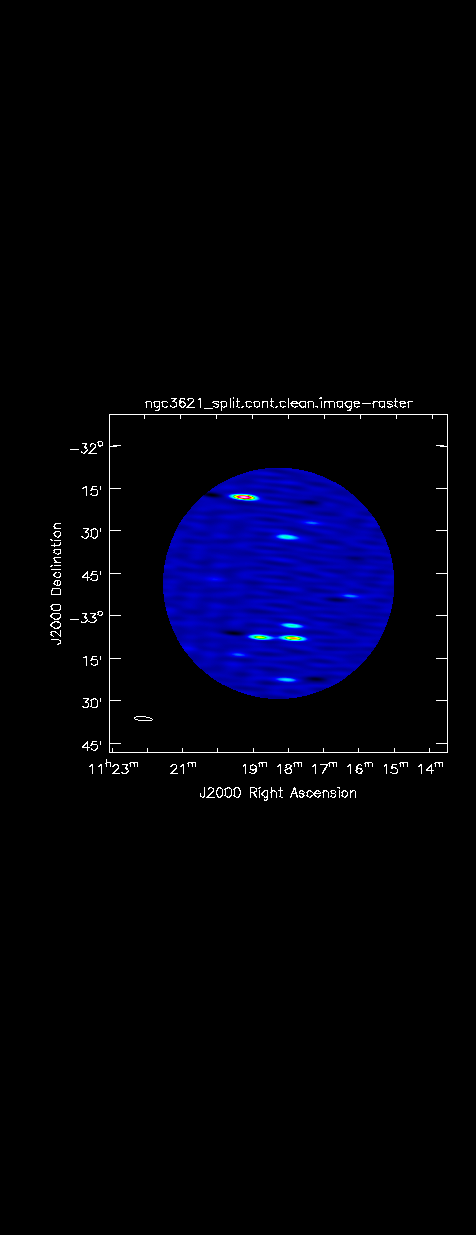

Show log 2020-03-29 09:26:51	INFO	viewer::::	
 2020-03-29 09:26:51	INFO	viewer::::+	##########################################
 2020-03-29 09:26:51	INFO	viewer::::+	##### Begin Task: viewer #####
 2020-03-29 09:26:51	INFO	viewer::::	viewer(infile="ngc3621_split.cont.clean.image",displaytype="raster",channel=0,zoom=1,outfile="viewer_temp.png",
 2020-03-29 09:26:51	INFO	viewer::::+ outscale=1.0,outdpi=300,outformat="png",outlandscape=False,gui=False)
 2020-03-29 09:26:56	INFO	viewer::::	##### End Task: viewer #####
 2020-03-29 09:26:56	INFO	viewer::::+	##########################################

In [18]:
viewer(cont_image+'.image')